In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


In [ ]:
# Importing Dataset
df_train = pd.read_csv("RavdessAudioOnlyFeatures_TRAIN.csv")


In [ ]:
# Checking No. of Instances
df_train.index

RangeIndex(start=0, stop=1828, step=1)

In [ ]:
# Checking No. of Instances
len(df_train.columns)

434

In [ ]:
# Getting,
# Numeric Columns
numeric_cols = list(df_train.select_dtypes(exclude=['object']).columns)

In [ ]:
# Getting,

# Categorical Columns
categorical_cols = list(df_train.select_dtypes(include=['object']).columns)

In [ ]:
categorical_cols

['modality',
 'vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex',
 'filename']

In [ ]:
# len of num and cat cols
print("total cols: {}, num cols : {}, cat cols : {}".format(len(df_train.columns), len(numeric_cols), len(categorical_cols)))

total cols: 434, num cols : 426, cat cols : 8


In [ ]:
# droppinf file name cz it doesnt matter
df_train.drop(columns='filename',axis=1, inplace=True)

In [ ]:
categorical_cols.remove("filename")

In [ ]:
for x in categorical_cols:
    print("{}: {}".format(x, df_train[x].unique()))

modality: ['audio-only']
vocal_channel: ['speech' 'song']
emotion: ['neutral' 'calm' 'happy' 'sad' 'angry' 'fearful' 'disgust' 'surprised']
emotional_intensity: ['normal' 'strong']
statement: ['Kids are talking by the door' 'Dogs are sitting by the door']
repetition: ['1st' '2nd']
sex: ['M' 'F']


In [ ]:
# Converting Categorical Attributes to Numeric Values

statement_map = {"Dogs are sitting by the door": 0, "Kids are talking by the door": 1}

emotional_intensity_map = {"normal": 0, "strong": 1}

emotion_map = {'neutral':0, 'calm':1, 'happy':2, 'sad':3, 'angry':4, 'fearful':5, 'disgust':6, 'surprised':7}

repetition_map = {"1st": 0, "2nd": 1}

vocal_channel_map = {"speech": 0, "song": 1}

sex_map = {"M": 0, "F": 1}

df_train.replace({"sex": sex_map, "emotional_intensity": emotional_intensity_map, 
            "vocal_channel": vocal_channel_map, "repetition": repetition_map, 
           "statement": statement_map, "emotion": emotion_map}, inplace=True)

In [ ]:
df_train.drop(columns='modality',axis=1, inplace=True)

In [ ]:
categorical_cols.remove("modality")

In [ ]:
df_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,0,0,0,1,0,1,0,158558,0.145081,9.150000e-07,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,0,0,0,1,1,1,0,160160,0.114319,7.137790e-07,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,0,0,0,0,0,1,0,156956,0.149963,9.554485e-07,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,0,0,0,0,1,1,0,152152,0.139618,9.176213e-07,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,0,1,0,1,0,1,0,169769,0.137665,8.108948e-07,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782


In [ ]:
df_train["vocal_channel"].value_counts()

0    1080
1     748
Name: vocal_channel, dtype: int64

In [ ]:
df_train[categorical_cols]

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex
0,0,0,0,1,0,0
1,0,0,0,1,1,0
2,0,0,0,0,0,0
3,0,0,0,0,1,0
4,0,1,0,1,0,0
...,...,...,...,...,...,...
1823,0,7,0,0,1,1
1824,0,7,1,1,0,1
1825,0,7,1,1,1,1
1826,0,7,1,0,0,1


In [ ]:
X = df_train.drop("emotional_intensity",axis=1)
y = df_train["emotional_intensity"]

In [ ]:
X

,vocal_channel,emotion,statement,repetition,actor,sex,frame_count,sum,mean,std,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,0,0,1,0,1,0,158558,0.145081,9.150000e-07,0.004001,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,0,0,1,1,1,0,160160,0.114319,7.137790e-07,0.004283,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,0,0,0,0,1,0,156956,0.149963,9.554485e-07,0.005084,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,0,0,0,1,1,0,152152,0.139618,9.176213e-07,0.004886,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,0,1,1,0,1,0,169769,0.137665,8.108948e-07,0.002956,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,0,7,0,1,18,1,168168,-0.154480,-9.186051e-07,0.005399,...,1.0,0.000000,0.000000,0.542632,0.728154,0.893268,1.0,1.0,0.262900,-1.051814
1824,0,7,1,0,18,1,174575,-0.139679,-8.001086e-07,0.008788,...,1.0,0.000000,0.000000,0.375423,0.702983,0.900089,1.0,1.0,-0.857759,-0.608583
1825,0,7,1,1,18,1,169770,-0.210968,-1.242670e-06,0.009933,...,1.0,0.000000,0.097608,0.446789,0.686781,0.891486,1.0,1.0,-0.656632,-0.586954
1826,0,7,0,0,18,1,185786,-0.085876,-4.622332e-07,0.012221,...,1.0,0.000000,0.000000,0.484284,0.712452,0.869563,1.0,1.0,-0.499022,-0.849045


In [ ]:
# Data Partitioning
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [ ]:
df_train["emotional_intensity"].value_counts()

0    984
1    844
Name: emotional_intensity, dtype: int64

In [ ]:
# # Select subset of attributes for classification
# from sklearn.ensemble import RandomForestClassifier

# # Separate target variable from input features
# y = df_train["emotional_intensity"]
# X = df_train.drop("emotional_intensity", axis=1)

# # splitting 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# # Train a Random Forest classifier and get feature importances
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)
# rf_feature_importances = clf.feature_importances_

# # Select the top 50 most important features
# num_features_to_select = 200
# rf_selected_features = X.columns[rf_feature_importances.argsort()[::-1][:num_features_to_select]]

# # Create a new DataFrame with only the selected features
# rf_selected_data = df_train[rf_selected_features].columns

# y_pred = clf.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred, digits=3))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)
feature_importances = clf.feature_importances_

# Select the top 50 most important features
num_features_to_select = 100
dt_selected_features = X.columns[feature_importances.argsort()[::-1][:num_features_to_select]]

# Create a new DataFrame with only the selected features
dt_selected_data = df_train[dt_selected_features].columns

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.6593806921675774
F1-score [0.6846543  0.62970297]
              precision    recall  f1-score   support

           0      0.684     0.686     0.685       296
           1      0.631     0.628     0.630       253

    accuracy                          0.659       549
   macro avg      0.657     0.657     0.657       549
weighted avg      0.659     0.659     0.659       549



In [ ]:
len(dt_selected_data)

100

In [ ]:
# # extracting important features from rf and dt
# impt_featuresset = list(rf_selected_data.intersection(dt_selected_data)) + categorical_cols

In [ ]:
# len(impt_featuresset)

In [ ]:
# df_train[impt_featuresset].columns

In [ ]:
dt_selected_data = list(dt_selected_data) + categorical_cols

# Retraining


## Retrain using impt features selected "Random Forest" with "emotional_intensity" attribute



In [ ]:
# # Retrain using impt features selected "Random Forest" with "vocal channel" attribute

# # Separate target variable from input features 
# y = df_train[impt_featuresset]["emotional_intensity"]
# X = df_train[impt_featuresset].drop("emotional_intensity",axis=1)

# # splitting
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
# # Train a Random Forest classifier and get feature importances
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred, digits=3))

## Retrain using impt features selected "Decision Tree" with "emotional_intensity" attribute



In [ ]:

X = df_train[dt_selected_data].drop("emotional_intensity",axis=1)
y = df_train[dt_selected_data]["emotional_intensity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.663023679417122
F1-score [0.6921797 0.6277666]
              precision    recall  f1-score   support

           0      0.682     0.703     0.692       296
           1      0.639     0.617     0.628       253

    accuracy                          0.663       549
   macro avg      0.661     0.660     0.660       549
weighted avg      0.662     0.663     0.662       549



# Comparing Performance before and after reducing attributes
# with all

Accuracy 0.6612021857923497
F1-score [0.68896321 0.628     ]

1)After Training on 300 most important features by dt
Accuracy 0.6612021857923497
F1-score [0.68791946 0.62948207]

2)After Training on 200 most important features by dt
Accuracy 0.6612021857923497
F1-score [0.68896321 0.628     ]

3)After Training on 100 most important features by dt
Accuracy 0.663023679417122
F1-score [0.6921797 0.6277666]




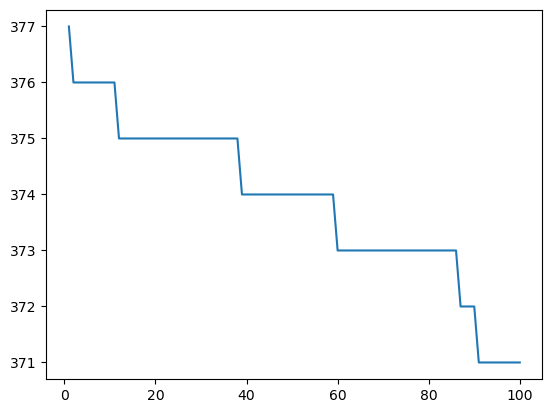

In [ ]:
# Getting Highly correlated attributes from 100% to 1%

# Compute the correlation matrix
corr_matrix = df_train.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

no_corr_att = [] #no. of correlated attributes

for i in range(100, 0, -1):
     highly_correlated = [column for column in upper.columns if any(upper[column] > (i * 0.001))]
     no_corr_att.append(len(highly_correlated))

plt.plot(range(100, 0, -1), no_corr_att)

(370.75, 371.5)

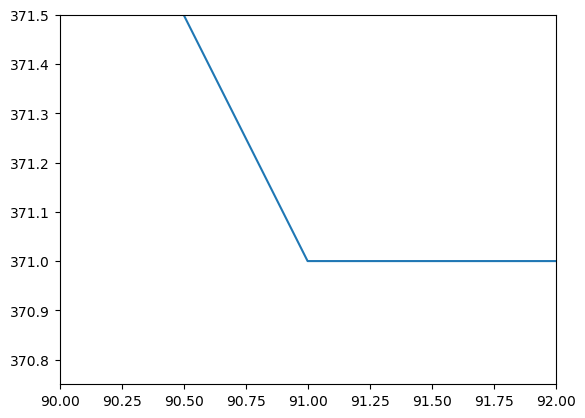

In [ ]:
plt.plot(range(100, 0, -1), no_corr_att)
plt.xlim(90, 92)
plt.ylim(370.75, 371.5)

# so, above 91% there are 371 highly correlated attributes to be removed

In [ ]:
highly_correlated = [column for column in upper.columns if any(upper[column] > (91 * 0.001))]
len(highly_correlated)
len(df_train.columns) - len(highly_correlated)

61

In [ ]:
# Variance Threshold
np.histogram(np.var(X_train, axis=0)[np.var(X_train, axis=0) < 3.14e04])

(array([334,   4,   0,   1,   3,   4,   1,   1,   1,   2]),
 array([    0.        ,  1985.42335448,  3970.84670897,  5956.27006345,
         7941.69341794,  9927.11677242, 11912.54012691, 13897.96348139,
        15883.38683587, 17868.81019036, 19854.23354484]))

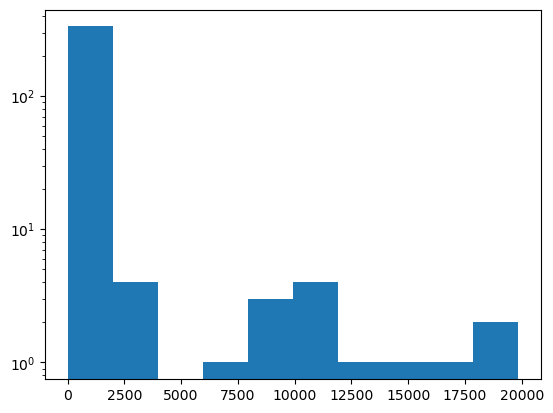

In [ ]:
plt.hist(np.var(X_train, axis=0)[np.var(X_train, axis=0) < 3.14e04])
plt.yscale('log')
plt.show()